Sarcasm Dataset
----------
- imdb에서 다시 돌아와서, 이번에도 sarcasm dataset을 이용해서 응용을 해볼 예정
- sarcasm dataset을 이용해서 학습을 진행하고, accuracy와 loss function에 대해서 논하는 것이 목표

**Note:** This notebook can run using TensorFlow 2.5.0

In [1]:
#!pip install tensorflow==2.5.0

In [2]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

- 전과 같이 json과 TensorFlow를 불러오고, Tokenzer와 pad_sequence도 불러옴

In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


- 사용할 hyperparameter
- sarcasm data에는 27,000개의 자료가 있는데 그중 20,000개 정도를 training하는데 사용할 예정

In [4]:
# sarcasm.json
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 88.9MB/s]


- 링크를 통해서 다운로드

In [5]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

- data를 우리가 사용할 변수에다 assign

In [6]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

- 전체 데이터 중 0번째부터 training_size번째까지의 data를 training data로 사용하고, training_size번째부터 마지막 번째까지의 data를 testing data로 사용하기 위해서 위와 같은 과정을 거침

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [8]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

- Lab1 때와 같이 sequencing하고 padding 과정을 거침

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

- tf.keras.layers.Embedding: 각 단어마다 16차원의 배열을 할당함으로써 단어가 가지는 특성(긍정, 부정)을 16차원의 값을 통해서 표현
- tf.keras.layers.GlobalAveragePooling1D: 2차원 벡터를 input으로 사용할 수 있도록 1차원 벡터로 만드는 역할(이번에는 평균값을 사용)
- tf.keras.layers.Dense: classification을 위해서 각 relu, sigmoid를 activation fn으로 가지는 layer에 assign
- label 값이 이원화 되어있기 때문에 binary_crossentropy를 사용
- 추가로 optimizer로 Adam을 사용한 모습을 확인 가능

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 6s - loss: 0.6715 - accuracy: 0.5678 - val_loss: 0.6064 - val_accuracy: 0.7149
Epoch 2/30
625/625 - 3s - loss: 0.4518 - accuracy: 0.8151 - val_loss: 0.3909 - val_accuracy: 0.8414
Epoch 3/30
625/625 - 3s - loss: 0.3166 - accuracy: 0.8747 - val_loss: 0.3550 - val_accuracy: 0.8527
Epoch 4/30
625/625 - 3s - loss: 0.2637 - accuracy: 0.8985 - val_loss: 0.3441 - val_accuracy: 0.8571
Epoch 5/30
625/625 - 3s - loss: 0.2269 - accuracy: 0.9136 - val_loss: 0.3437 - val_accuracy: 0.8566
Epoch 6/30
625/625 - 3s - loss: 0.2010 - accuracy: 0.9229 - val_loss: 0.3511 - val_accuracy: 0.8557
Epoch 7/30
625/625 - 3s - loss: 0.1780 - accuracy: 0.9337 - val_loss: 0.3594 - val_accuracy: 0.8554
Epoch 8/30
625/625 - 3s - loss: 0.1601 - accuracy: 0.9404 - val_loss: 0.3876 - val_accuracy: 0.8456
Epoch 9/30
625/625 - 3s - loss: 0.1439 - accuracy: 0.9482 - val_loss: 0.3887 - val_accuracy: 0.8550
Epoch 10/30
625/625 - 2s - loss: 0.1309 - accuracy: 0.9540 - val_loss: 0.4194 - val_accuracy: 0.8445

- Epoch의 개수를 30으로 두어 학습을 진행
- 최종 accuracy: 99.3%
- 최종 validation: 81.5%

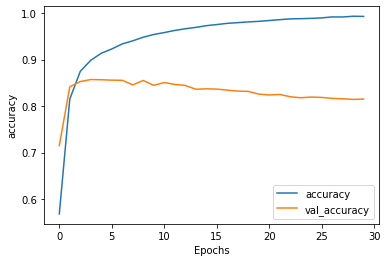

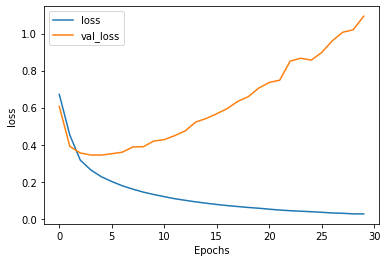

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

- Epoch당 Accuracy와 validation의 accuracy와 loss를 나타낸 그래프
- 주목할 점은 Epoch의 증가함에 따라서 validation의 loss가 증가하는 모습을 볼 수 있는데, 이는 하이퍼파라미터 조정과 embedding dimension 조정을 통해서 조절할 수 있음
- accuracy가 90% 이상을 기록하면서 loss 값이 급격하게 증가하지 않는 조합을 찾는 것이 학습에 있어서 중요

In [13]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


- decode_review(text): decoding하는 과정으로 인덱스의 맞는 단어들을 출력. 이때 ' '.join 함수로 단어 사이에 공백을 두고 출력하게 하고 모르는 단어(OOV)는 '?'를 통해 출력

In [14]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


- embedding layer의 모습
- 10,000개의 단어를 16차원의 벡터를 통해서 표현한 것을 확인 가능

In [15]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

- Visualization을 위해서 vector data와 meta data를 추출하는 모습
- vecs.tsv: 각 단어에 할당된 16차원 벡터 데이터
- meta.tsv: 각 단어의 토큰화된 모습이 아닌 진짜 모습

In [16]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- vecs.tsv 파일과 meta.tsv 파일을 직접 다운로드하는 모습
- [projector.tensorflow.org](https://projector.tensorflow.org)에서 데이터를 직접 넣어서 클러스터링 visualization 확인 가능

In [17]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[7.746504e-01]
 [6.056994e-06]]


- 하나의 예문을 토큰을 이용해서 sequencing한 모습